In [34]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import numpy as np

In [35]:
df = pd.read_csv('tempo.csv',sep=';')

Identificando as informações da primeira coluna

In [36]:
df.columns

Index(['Aparencia', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')

In [43]:
df['Aparencia'].value_counts()
lst=[5,5,3,1]
mediana = np.mean(lst)

In [44]:
df['Aparencia'].value_counts()

sol        5
chuva      5
nublado    3
menos      1
Name: Aparencia, dtype: int64

In [59]:
df.loc[df['Aparencia'] == 'menos', 'Aparencia'] = 'sol'

In [60]:
df ['Aparencia'].value_counts()

sol        5
chuva      5
nublado    4
Name: Aparencia, dtype: int64

Identifiquei o campo de erro, identifiquei a mediana e apliquei a alteração no dado.

-------------- PROXIMA COLUNA ---------------

In [53]:
df.columns

Index(['Aparencia', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')

In [62]:
df['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

como existem valores discrepantes, o melhor metodo a ser utilizado é a mediana.

<Axes: >

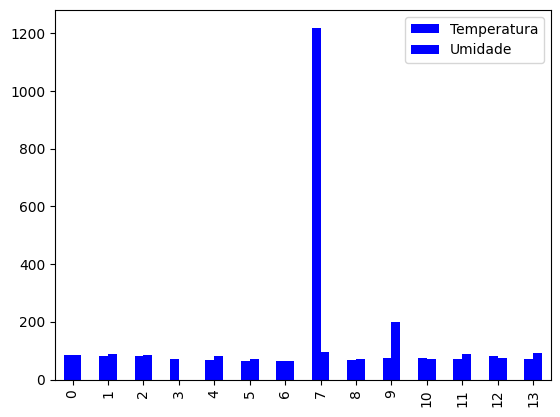

In [66]:
df.plot.bar(color='blue')

aplicando a mediana para corrigir o problema

In [71]:
mediana = df['Temperatura'].describe()['50%']
mediana

df.loc[df['Temperatura'] == df['Temperatura'].describe()['max'] , 'Temperatura'] = mediana

In [72]:
df['Temperatura'].describe()

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

------- proxima coluna ---------------

In [73]:
df.columns

Index(['Aparencia', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')

In [82]:
#Primeiro passo, estou utilizando dados numéricos, portanto devo utilizar media,  mediana, máximo ou minimo
#como neste caso existem valores discrepantes e nulos, devemos utilizar a mediana.
df['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

<Axes: >

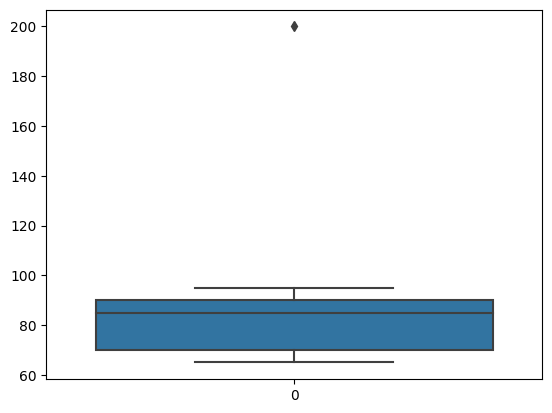

In [83]:
srn.boxplot(df['Umidade'])

<Axes: >

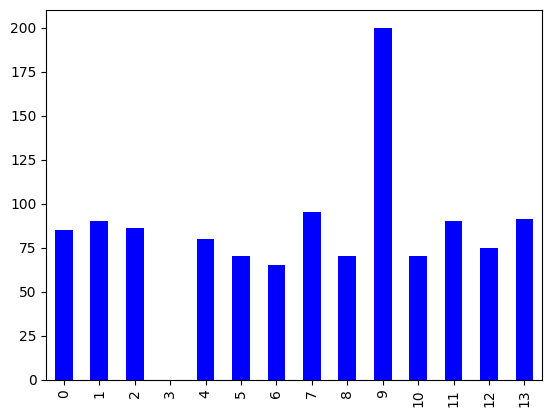

In [84]:
df['Umidade'].plot.bar(color='blue')

através da visualização do gráfico, identificamos 2 valores discrepantes, um zerado e um com mais do dobro dos maiores numeros.

In [87]:
df.loc[df['Umidade'] == df['Umidade'].describe()['max'] , 'Umidade'] = df['Umidade'].describe()['50%']
df['Umidade'].describe()

count    13.000000
mean     80.153846
std       9.044760
min      65.000000
25%      70.000000
50%      85.000000
75%      86.000000
max      91.000000
Name: Umidade, dtype: float64

Ateramos o valordiscrepante(200) para o valor da  mediana.

In [122]:
mediana = df['Umidade'].describe()['50%']
mediana
df['Umidade'] = df['Umidade'].fillna(mediana)

In [124]:
df['Umidade'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
Name: Umidade, dtype: bool

<Axes: >

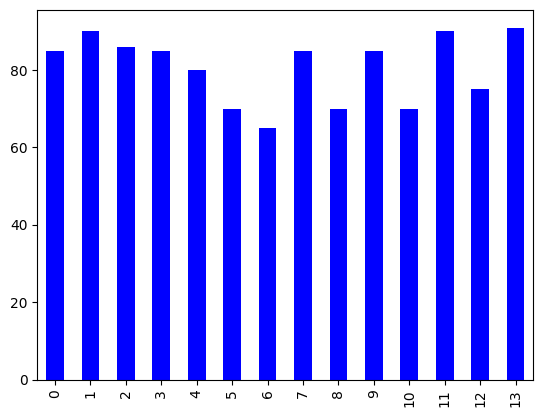

In [126]:
df['Umidade'].plot.bar(color='Blue')

identificamos os valores  discrepantes, aplicamos a mediana para substituilos

------------ PROXIMA COLUNA ------------

In [127]:
df.columns

Index(['Aparencia', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')

In [148]:
df['Vento'] 

0          FALSO
1     VERDADEIRO
2          FALSO
3          FALSO
4          FALSO
5     VERDADEIRO
6     VERDADEIRO
7          FALSO
8          FALSO
9            NaN
10    VERDADEIRO
11    VERDADEIRO
12         FALSO
13    VERDADEIRO
Name: Vento, dtype: object

através  da visualização das colunas, foi identificado um campo com o tipo de dado "nan", como se trata de  dados categóricos, devemos utilizar a moda.

In [149]:
df['Vento'].describe()

count        13
unique        2
top       FALSO
freq          7
Name: Vento, dtype: object

In [151]:
moda = df['Vento'].describe()['top']
moda
df['Vento'] = df['Vento'].fillna(moda)

In [152]:
df['Vento']

0          FALSO
1     VERDADEIRO
2          FALSO
3          FALSO
4          FALSO
5     VERDADEIRO
6     VERDADEIRO
7          FALSO
8          FALSO
9          FALSO
10    VERDADEIRO
11    VERDADEIRO
12         FALSO
13    VERDADEIRO
Name: Vento, dtype: object

identificamos o dado nulo na coluna, por ser dados categoricos, filtramos os dados nulos e aplicamos a moda.

--------- PROXIMA COLUNA ---------- 

In [154]:
df.columns

Index(['Aparencia', 'Temperatura', 'Umidade', 'Vento', 'Jogar'], dtype='object')

In [159]:
df['Jogar']

0     nao
1     nao
2     sim
3     sim
4     sim
5     nao
6     sim
7     nao
8     sim
9     sim
10    sim
11    sim
12    sim
13    nao
Name: Jogar, dtype: object

coluna jogar, nao tem nenhuma ação a ser realizada.